In [1]:
from LorisBallsBasedModel import *
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

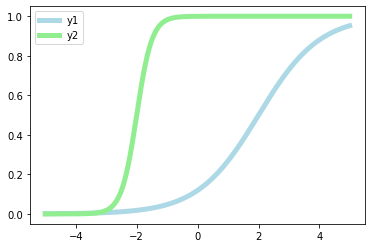

In [2]:
def shifted_sigmoid(x, shift, scale=1):
    return 1/(1+np.exp((-x+shift)*scale))

x = np.repeat(np.arange(-5,5,.01).reshape(-1, 1), repeats=2, axis=1)
y1 = shifted_sigmoid(x[:, 0], 2).reshape(-1, 1)  # shifted activation function
y2 = shifted_sigmoid(x[:, 1], -2, 4).reshape(-1, 1)  # shifted and scaled activation function
y = np.concatenate((y1, y2), axis=1)

plt.plot(x[:, 0], y[:, 0], label='y1', color='lightblue', linewidth=5)
plt.plot(x[:, 1], y[:, 1], label='y2', color='lightgreen', linewidth=5)
plt.legend()
plt.show()

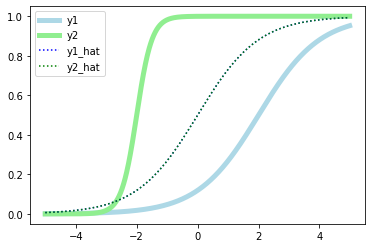

In [3]:
model = SingleLayerPerceptron(ShiftedActivation('sigmoid', scale_activation_function=True))
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['acc'])
y_hat = model.predict(x)  # before training prediction

plt.plot(x[:, 0], y[:, 0], label='y1', color='lightblue', linewidth=5)
plt.plot(x[:, 1], y[:, 1], label='y2', color='lightgreen', linewidth=5)
plt.plot(x[:, 0], y_hat[:, 0], label='y1_hat', color='b', linestyle=':')
plt.plot(x[:, 1], y_hat[:, 1], label='y2_hat', color='g', linestyle=':')
plt.legend()
plt.show()

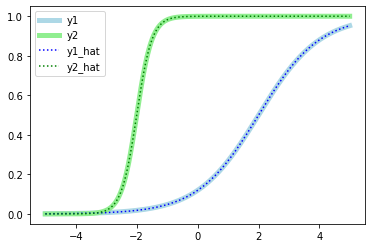

In [4]:
history = model.fit(x,
                    y,
                    epochs=200,
                    verbose=0)

y_hat = model.predict(x)  # after training prediction

plt.plot(x[:, 0], y[:, 0], label='y1', color='lightblue', linewidth=5)
plt.plot(x[:, 1], y[:, 1], label='y2', color='lightgreen', linewidth=5)
plt.plot(x[:, 0], y_hat[:, 0], label='y1_hat', color='b', linestyle=':')
plt.plot(x[:, 1], y_hat[:, 1], label='y2_hat', color='g', linestyle=':')
plt.legend()
plt.show()

In [5]:
model.output_layer.shift

<tf.Variable 'single_layer_perceptron/shifted_activation/shift:0' shape=(2,) dtype=float32, numpy=array([-2.,  2.], dtype=float32)>

In [6]:
model.output_layer.scale

<tf.Variable 'single_layer_perceptron/shifted_activation/scale:0' shape=(2,) dtype=float32, numpy=array([0.99999994, 3.9999945 ], dtype=float32)>